# 11110EE466000 Introduction of Reinforcement Learning Exam 4

Scoring rule:

Most of the rules are the same as the last exam.

<font color=#FF0000>

ONLY modify your code in the comment block to ensure your functions can be tested correctly.

##Required functions and library
Please run the following cells first.

In [267]:
import numpy as np
import numpy.random as rd
import matplotlib.pyplot as plt

In [268]:
def moving_averages(a):
  return [np.average(a[i:i+20]) for i in range(len(a)-19)]

## Problem1 variables

You may add new variables here, but do not modify the order in ACTIONS.

In [269]:
WORLD_SIZE = 6
S0 = [5, 0]
ST = [1, 5]
ACTIONS = [[0, -1], [-1, 0], [0, 1], [1, 0]] # left, up, right, down

##Problem1(60%): The grid world

In this environment, please calculate returns of Sarsa, Sarsa(λ)，Actor-critic algorithm.



###1.1(10%): Build the environment

In this grid world, the tiles in green represent swamp. The yellow one represents the terminal state, and the blue one represents the initial state.

Four actions can be taken: left, up, right and down.

Given a state and an action, please write a function that returns the  next-state and the corresponding reward.
Reward is -100 if the agent moves into swamp, all other transitions yield reward of -1.

The input state is a list, and the action should be chosen from the variable 'ACTIONS'.

<font color=#FF0000>

**After an action is taken, there is a 30% chance that the agent can be blown to the left, i.e., S'<-S'-(0,1) with the probability of 0.3,another 30% chance that the agent can be blown to the right, i.e., S'<-S'+(0,1) with the probability of 0.3**
</font>

And the output is a list with [next_state1, reward1].

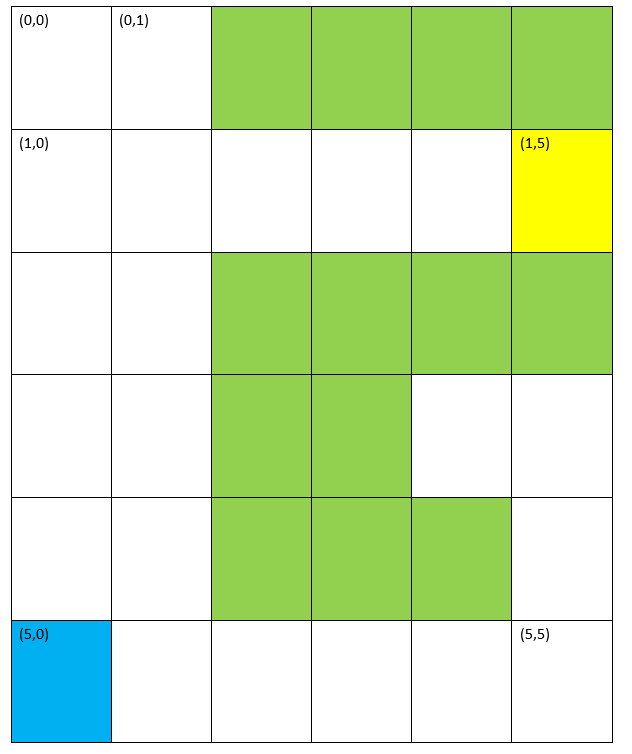

For example, 

input = [1,5], ACTIONS[3]

output = [[2,5], -100]

maybe[[2,4], -100]

---


input = [5,5], ACTIONS[0]

output = [[5,4], -1]

maybe[[5,3], -1] or [[5,5], -1]

---


input = [3,2], ACTIONS[2]

output = [[3,3], -100]


---


input = [0,5], ACTIONS[2]

output = [[0,5], -100]


---

input = [0,0], ACTIONS[0]

output = [[0,0], -1]


In [270]:
def step1(state, action):
  ###### Your code here ######
  SWAMP = [[0,2],[0,3],[0,4],[0,5],[2,2],[2,3],[2,4],[2,5],[3,2],[3,3],[4,2],[4,3],[4,4]]
  s1 = list(np.array(state) + np.array(action))
  r1 = -1
  if s1[0] >= WORLD_SIZE or s1[1] >= WORLD_SIZE or s1[0] < 0 or s1[1] < 0:
    s1 = state
  if s1 in SWAMP:
    r1 = -100
  #print(s1)

  wind = rd.rand()
  #print(wind)
  if wind > 0 and wind <=0.3:
    s1[1] = s1[1] + 1
    if s1[1] >= WORLD_SIZE or s1[1] < 0:
      s1[1] = s1[1] - 1
    if s1 in SWAMP:
      r1 = -100
    else:
      r1 = -1
  elif wind > 0.3 and wind <=0.6:
    s1[1] = s1[1] - 1
    if s1[1] >= WORLD_SIZE or s1[1] < 0:
      s1[1] = s1[1] + 1
    if s1 in SWAMP:
      r1 = -100
    else:
      r1 = -1
  
  ################################
  return [s1,r1]

####Test your function


In [271]:
print(step1([1,5], ACTIONS[3]))
print(step1([5,5], ACTIONS[0]))
print(step1([3,2], ACTIONS[2]))
print(step1([0,5], ACTIONS[2]))
print(step1([0,0], ACTIONS[0]))


[[2, 5], -100]
[[5, 5], -1]
[[3, 3], -100]
[[0, 5], -100]
[[0, 1], -1]


###1.2(10%): Sarsa

Using the environment in 1.1, please implement Sarsa with $\gamma=1 $, $\alpha=0.1$ and $\epsilon=0.1$ over 500 episodes.

The output 'returns' is a list consisting of return 'G' from each episode.

In [272]:
GAMMA=1.0
ALPHA=0.1
EPSILON=0.1

In [273]:
def chooseAction(state, qtable, epsilon):
  if rd.rand()>=epsilon:
    return np.argmax(qtable[state[0],state[1]])
  else:
    return rd.randint(4)

In [274]:
def sarsa():
  ###### Your code here ######
  returns = []
  q_value = rd.rand(WORLD_SIZE, WORLD_SIZE, len(ACTIONS))
  q_value[ST[0]][ST[1]] = 0
  for z in range(500):
    #print(z)
    rewards = 0
    state = S0
    action = chooseAction(state, q_value, EPSILON)
    while state != ST:
      new_state, reward = step1(state, ACTIONS[action])
      new_action = chooseAction(new_state, q_value, EPSILON)
      q_value[state[0], state[1], action] = q_value[state[0], state[1], action] + ALPHA * (reward + GAMMA * q_value[new_state[0], new_state[1], new_action] - q_value[state[0], state[1], action])
      rewards += reward
      action = new_action
      state = new_state

    returns.append(rewards)
  ################################
  return returns

###1.3(20%): Sarsa(λ)

Using the environment in 1.1, please implement Sarsa(λ) with $\gamma=1 $, $\alpha=0.1$, $\epsilon=0.1$ and  $λ=0.5$ over 500 episodes.

The output 'returns' is a list consisting of return 'G' from each episode.

In [275]:
GAMMA=1.0
ALPHA=0.1
EPSILON=0.1
LAMBDA=0.5

In [276]:
def sarsa_L():
  ###### Your code here ######
  qtable = rd.rand(WORLD_SIZE, WORLD_SIZE, len(ACTIONS))
  qtable[ST[0],ST[1],:] = 0
  returns = []
  for episode in range(500):
    rewards = 0
    ztable = rd.rand(WORLD_SIZE, WORLD_SIZE, len(ACTIONS))
    state = S0
    action = chooseAction(state, qtable, EPSILON)
    while state != ST:
      new_state, reward = step1(state, ACTIONS[action])
      new_action = chooseAction(new_state, qtable, EPSILON)
      delta = reward + GAMMA * qtable[new_state[0], new_state[1], new_action] - qtable[state[0], state[1], action]
      ztable[state[0], state[1], action] = ztable[state[0], state[1], action] + 1
      for i in range(0, qtable.shape[0]):
        for j in range(0, qtable.shape[1]):
          for k in range(0, 4):
            qtable[i, j, k] = qtable[i, j, k] + ALPHA * delta * ztable[i, j, k]
            ztable[i, j, k] = GAMMA * LAMBDA * ztable[i, j, k]

      rewards += reward
      action = new_action
      state = new_state

    returns.append(rewards)
  ################################
  return returns

### 1.4(20%): Actor-Critic

Using the environment in 1.1, please implement Actor-Critic with $\gamma=1 $,  learning rate for policy $\alpha_\theta=0.001$, learning rate for value state $\alpha_v=0.1$ over 500 episodes.

The output 'returns' is a list consisting of return 'G' from each episode.

In [277]:
GAMMA = 1.0
ALPHA_theta = 0.001
ALPHA_v = 0.1


In [278]:
# use policy choose action 5%
def chooseAction_pg(pi):
  ###### Your code here ######
  action = np.random.choice(4, p=pi)
  ################################
  return action

In [279]:
def softmax(theta):
  P = np.zeros([len(theta)])
  e = np.exp(theta)
  for i in range(len(theta)):
    P[i] = e[i] / np.sum(e, axis=0)
  return P

In [280]:
# calculate gradient of ln theta 10%
def gradient_ln( action, policy):
  ###### Your code here ######
  grad_num = np.zeros([len(policy)])
  grad = np.zeros([len(policy)])
  for x in range(len(policy)):
    if x == action:
      grad_num[x] = policy[x] * (1 - policy[action])
    else:
      grad_num[x] = (-1) * policy[action] * policy[x]
    grad[x] = grad_num[x] / policy[action]
  ################################
  return grad

In [281]:
# Actor critic 5%
def AC():
    ###### Your code here ######
  h_table = np.zeros([WORLD_SIZE, WORLD_SIZE, len(ACTIONS)]) #h is theta
  v_table = np.zeros([WORLD_SIZE, WORLD_SIZE])
  pi = np.ones([WORLD_SIZE, WORLD_SIZE, len(ACTIONS)]) * 0.25
  returns = []
  for episode in range(500):
    state = S0
    G = 0
    while state != ST:
      action = chooseAction_pg(pi[state[0],state[1]]) #line 8
      state_n, reward = step1(state, ACTIONS[action])  #line 9
      delta = reward + GAMMA * v_table[state_n[0], state_n[1]] - v_table[state[0], state[1]]  #line 10
      grad_ln = gradient_ln(action, pi[state[0], state[1]])  #line 11
      h_table[state[0], state[1]] += ALPHA_theta * delta * grad_ln
      pi[state[0], state[1]] = softmax(h_table[state[0], state[1]])
      v_table[state[0], state[1]] += ALPHA_v * delta  #line 12
      state = state_n
      G += reward
    returns.append(G)
    ################################
  return returns

###Comparison
You can check your correctness in this part.

Uncomment the lines below after you finish them.


The results:

1. Sarsa(λ) will learn faster than Sarsa in the beginning.

2. AC have best returns in the end.


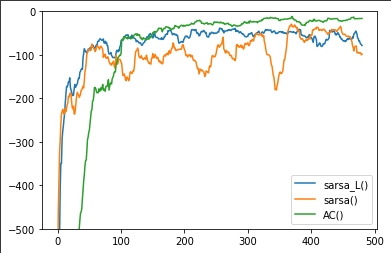

In [282]:
A1=moving_averages(np.average([sarsa_L() for i in range(5)],axis=0))

In [283]:
A2=moving_averages(np.average([sarsa() for i in range(5)],axis=0))

In [284]:
A3=moving_averages(np.average([AC() for i in range(5)],axis=0))

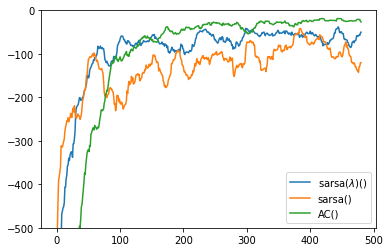

In [285]:
plt.figure()
plt.plot(A1,label='sarsa($\lambda$)()')
plt.plot(A2,label='sarsa()')
plt.plot(A3,label='AC()')
plt.ylim(-500, 0)
plt.legend()
plt.show()

## Problem2(40%)  
Consider the small corridor inset shown in the graph below. There are only two actions, right and left.
These actions have their usual consequences in s0 (left causes no movement in the s0), but in the s1 and s2 they are reversed, so that action 'right' yields left movement and action 'left' yields right movement, s3 is the terminal state.
The problem is difficult because all the states appear identical.

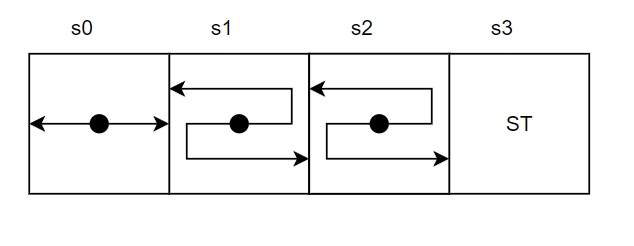

###2.1(15%): Build the environment

In this environment, the initial state is s0.
two actions can be taken: left, right.


Reaching the terminal state yields a reward of 0, the others transitions yield reward of -1.


These actions have their usual consequences in s0(left causes no movement in the s0), but in the s1 and s2 they are reversed.

The input action is a int, input 1 to go right, input 0 to go left.

The output is a list with [o1, o2].

o1$\leftarrow$ if the state after moving is terminal state, return True, else return False.

o2$\leftarrow$ if o1 is 1 return 0, else return -1.(this represents reward).



For example, 

after reset environment

input = 1
output = [False, -1]

input = 0
output = [False, -1]

input = 0
output = [True, 0]

-----------------------------------
after reset environment

input = 1
output = [False, -1]

input = 1
output = [False, -1]

input = 1
output = [False, -1]

input = 0
output = [False, -1]

input = 0
output = [True, 0]

-----------------------------------
after reset environment

input = 1
output = [False, -1]

input = 0
output = [False, -1]

input = 1
output = [False, -1]

input = 0
output = [False, -1]

input = 0
output = [True, 0]

-----------------------------------
after reset environment

input = 0
output = [False, -1]

input = 1
output = [False, -1]

input = 0
output = [False, -1]

input = 0
output = [True, 0]




In [286]:
class ShortCorridor:
    """
    Short corridor environment
    """
    def __init__(self):
        self.reset()

    def reset(self):
        self.state = 0

    def step(self, go_right):
      o1=True
      o2=0
        ###### Your code here ######
      if self.state == 0:
        if go_right == 1:
          self.state = self.state + 1
        elif go_right == 0:
          self.state = self.state
      elif self.state == 1 or 2:
        if go_right == 1:
          self.state = self.state - 1
        elif go_right == 0:
          self.state = self.state + 1
      if self.state == 3:
        self.reward = 0
        o1 = True
      else:
        self.reward = -1
        o1 = False
      o2 = self.reward
        ################################
      return [o1, o2]

####Test your function


In [287]:
env = ShortCorridor()

env.reset()
print(env.step(1))
print(env.step(0))
print(env.step(0))
print('----------------------')
env.reset()
print(env.step(1))
print(env.step(1))
print(env.step(1))
print(env.step(0))
print(env.step(0))
print('----------------------')
env.reset()
print(env.step(1))
print(env.step(0))
print(env.step(1))
print(env.step(0))
print(env.step(0))
print('----------------------')
env.reset()
print(env.step(0))
print(env.step(1))
print(env.step(0))
print(env.step(0))

[False, -1]
[False, -1]
[True, 0]
----------------------
[False, -1]
[False, -1]
[False, -1]
[False, -1]
[True, 0]
----------------------
[False, -1]
[False, -1]
[False, -1]
[False, -1]
[True, 0]
----------------------
[False, -1]
[False, -1]
[False, -1]
[True, 0]


### 2.2(0%)Random policy(example)
This example illustrates how to configure the environment.
 


In [288]:
def random_pi():

  env = ShortCorridor()
  returns = []
  for episode in range(500):
    env.reset()
    G = 0
    terminate = False
    while not terminate:
      action = rd.randint(2)
      terminate,reward = env.step(action)
      G += reward
    returns.append(G)

  return returns

### 2.3(10%)Q-learning
Please apply Q-learning in the environment, parameter $\epsilon$=0.1
$\alpha$=0.2, $\gamma$=1.0, over 500 episodes.
 The output 'returns' is a list consisting of return 'G' from each episode.

In [289]:
def chooseAction(state, qtable, epsilon):
  if rd.rand()>=epsilon:
    return np.argmax(qtable[state])
  else:
    return rd.randint(len(ACTIONS))

In [290]:
EPSILON=0.1
ALPHA=0.2
GAMMA=1.0
ACTIONS=[0, 1]
def Q_learning():
  ###### Your code here ######
  S0 = 0
  ST = 3
  env = ShortCorridor()
  q_value = np.zeros([4, 2])
  returns = []
  for z in range(500):
    env.reset()
    rewards = 0
    state = S0
    while state != ST:
      action = chooseAction(env.state, q_value, EPSILON)
      [o1, o2] = env.step(ACTIONS[action])
      q_value[state, action] += ALPHA * (env.reward + GAMMA * np.max(q_value[env.state]) - q_value[state, action])
      rewards += o2
      #print(o2)
      state = env.state

    returns.append(rewards)
  ################################
  return returns

### 2.4(15%)Actor-Critic
Please apply Actor-Critic in the environment with $\gamma=1 $,  learning rate for policy $\alpha_\theta=0.001$, learning rate for value state $\alpha_v=0.01$ over 500 episodes.
 The output 'returns' is a list consisting of return 'G' from each episode.



In [291]:
GAMMA = 1.0
ALPHA_theta = 0.001
ALPHA_v = 0.01

# Actor critic
def chooseAction_pg(pi):
    ###### Your code here ######
  action = np.random.choice(2, p=pi)
    ################################
  return action

def softmax(theta):
  P = np.zeros([len(theta)])
  e = np.exp(theta)
  for i in range(len(theta)):
    P[i] = e[i] / np.sum(e, axis=0)
  return P

# Actor critic
def gradient_ln( action, policy):
  ###### Your code here ######
  grad_num = np.zeros([len(policy)])
  grad = np.zeros([len(policy)])
  for x in range(len(policy)):
    if x == action:
      grad_num[x] = policy[x] * (1 - policy[action])
    else:
      grad_num[x] = (-1) * policy[action] * policy[x]
    grad[x] = grad_num[x] / policy[action]
  ################################
  return grad

# Actor critic
def AC():
    ###### Your code here ######
  S0 = 0
  ST = 3
  ACTIONS = [0,1]
  env = ShortCorridor()
  h_table = np.zeros([4, 2]) #h is theta
  v_table = np.zeros([4])
  pi = np.ones([4, 2]) * 0.5
  returns = []
  for episode in range(500):
    env.reset()
    state = S0
    G = 0
    while state != ST:
      action = chooseAction_pg(pi[state]) #line 8
      env.step(ACTIONS[action])  #line 9
      delta = env.reward + GAMMA * v_table[env.state] - v_table[state]  #line 10
      grad_ln = gradient_ln(action, pi[state])  #line 11
      h_table[state] += ALPHA_theta * delta * grad_ln
      pi[state] = softmax(h_table[state])
      v_table[state] += ALPHA_v * delta  #line 12
      state = env.state
      G += env.reward
    returns.append(G)
    ################################
  return returns

###Comparison
You can check your correctness in this part.

Uncomment the lines below after you finish them.




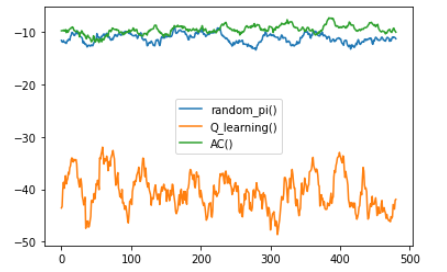

In [292]:
A4=np.average([random_pi() for i in range(5)],axis=0)

In [293]:
A5=np.average([Q_learning() for i in range(5)],axis=0)

In [294]:
A6=np.average([AC() for i in range(5)],axis=0)

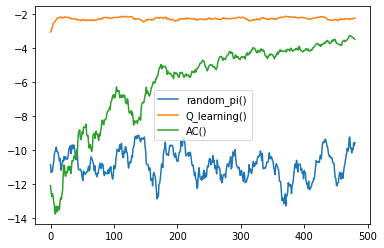

In [295]:
plt.figure()
plt.plot(moving_averages(A4),label='random_pi()')
plt.plot(moving_averages(A5),label='Q_learning()')
plt.plot(moving_averages(A6),label='AC()')

plt.legend()
plt.show()